In [1]:
import cfdadvection.advection as advec # Importing module  
import matplotlib.pyplot as plt
import numpy as np

### Top hat function 

/home/iandrew/Documents/College/computational-physics-2/Final/cfdadvection/cfdadvection/advection.py:118: RuntimeWarning: invalid value encountered in double_scalars
  r[i] = (a[i]-a[i-1])/(a[i+1]-a[i])
/home/iandrew/Documents/College/computational-physics-2/Final/cfdadvection/cfdadvection/advection.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  r[i] = (a[i]-a[i-1])/(a[i+1]-a[i])


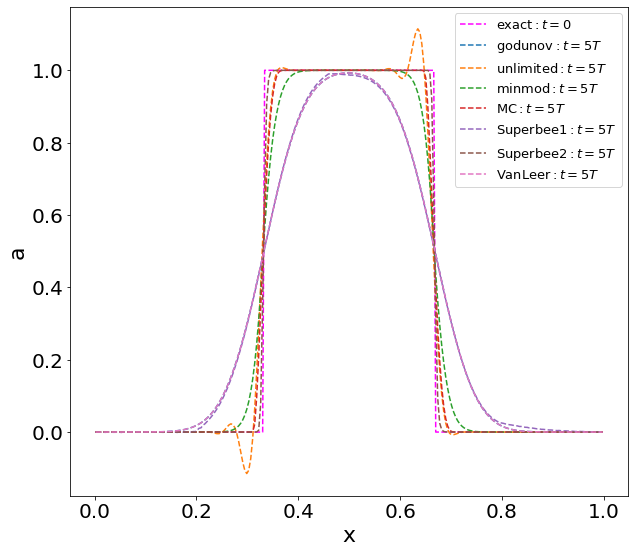

In [2]:
first = advec.Advection("top_hat",256 , 1 , 5) 

a1 = first.forms()  #.form function gives the Exact solution

#Advect top_hat profile using godunov approach with CFL = 0.8
a2 = first.advect("godunov", 0.8) 
#Advect top_hat profile using centered difference method with CFL = 0.8
a3 = first.advect("unlimited", 0.8) 
#Advect top_hat profile using minmod slope limiter with CFL = 0.8
a4 = first.advect("minmod", 0.8) 
#Advect top_hat profile using MC slope limiter with CFL = 0.8
a5 = first.advect("mc", 0.8) 
#Advect top_hat profile using Superbee1 slope limiter with CFL = 0.8
a6 = first.advect("superbee1", 0.8) 
#Advect top_hat profile using Superbee2(Book) slope limiter with CFL = 0.8
a7 = first.advect("superbee2", 0.8) 
#Advect top_hat profile using Van Leer slope limiter with CFL = 0.8
a8 = first.advect("van_leer", 0.8) 



# The function .plot() helps us giving us the actual x and y values to plot
x1, y1 = first.plot(a1) #Exact solution
x2, y2 = first.plot(a2)
x3, y3 = first.plot(a3)
x4, y4 = first.plot(a4)
x5, y5 = first.plot(a5)
x6, y6 = first.plot(a6)
x7, y7 = first.plot(a7)
x8, y8 = first.plot(a8)



# Begining of the plot

plt.figure(figsize=(10,9))

plt.plot(x1,y1, color = "magenta", linestyle = "--", label = r"${\rm exact}: t=0$")
plt.plot(x2, y2, linestyle = "--", label = r"${\rm godunov}: t=5 T$")
plt.plot(x3, y3, linestyle = "--", label = r"${\rm unlimited}: t=5 T$")
plt.plot(x4, y4, linestyle = "--", label = r"${\rm minmod}: t=5 T$")
plt.plot(x5, y5, linestyle = "--", label = r"${\rm MC}: t=5 T$")
plt.plot(x6, y6, linestyle = "--", label = r"${\rm Superbee1}: t=5 T$")
plt.plot(x7, y7, linestyle = "--", label = r"${\rm Superbee2}: t=5 T$")
plt.plot(x8, y8, linestyle = "--", label = r"${\rm Van Leer}: t=5 T$")



ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('x', size=22)
plt.ylabel('a', size=22)

plt.legend(fontsize=13)
plt.savefig('./outputfolder/Tophatcomparison_plot.png')

In [3]:
# Here we define the L2 norm error as a function to use it later
def L2_norm(sol_exact, sol_aprox): 
        
    norm = np.sqrt(np.sum(np.abs((sol_exact - sol_aprox))**2)/len(y1))
    
    return norm

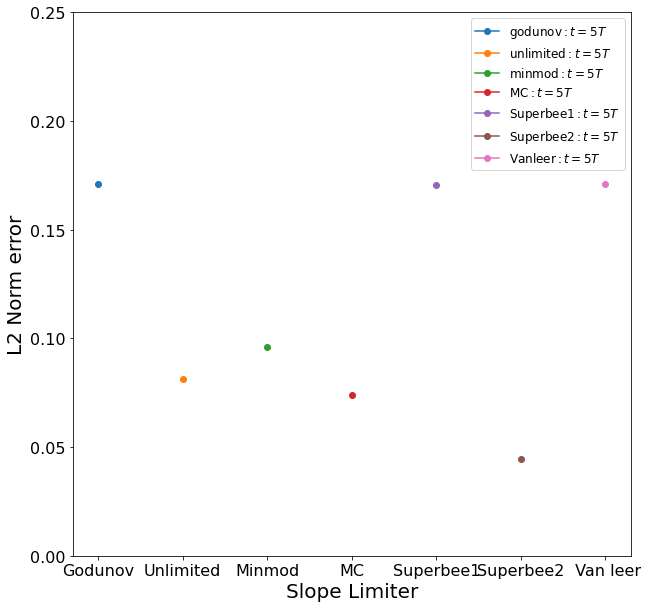

In [4]:
slope_lim = [1, 2, 3, 4, 5, 6,7 ]
lim_names = ['Godunov', 'Unlimited', 'Minmod', 'MC', 'Superbee1', 'Superbee2', ' Van leer' ]
norms = np.zeros(7)
norms[0] = L2_norm(y1,y2)
norms[1] = L2_norm(y1,y3)
norms[2] = L2_norm(y1,y4)
norms[3] = L2_norm(y1,y5)
norms[4] = L2_norm(y1,y6)
norms[5] = L2_norm(y1,y7)
norms[6] = L2_norm(y1,y8)


plt.figure(figsize=(10,10))

plt.plot(slope_lim[0], norms[0], "-o", label = r"${\rm godunov}: t=5 T$")
plt.plot(slope_lim[1], norms[1], "-o", label = r"${\rm unlimited}: t=5 T$")
plt.plot(slope_lim[2], norms[2], "-o", label = r"${\rm minmod}: t=5 T$")
plt.plot(slope_lim[3], norms[3], "-o", label = r"${\rm MC}: t=5 T$")
plt.plot(slope_lim[4], norms[4], "-o", label = r"${\rm Superbee1}: t=5 T$")
plt.plot(slope_lim[5], norms[5], "-o", label = r"${\rm Superbee2}: t=5 T$")
plt.plot(slope_lim[6], norms[6], "-o", label = r"${\rm Van leer}: t=5 T$")


ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Slope Limiter', size=20)
plt.ylabel('L2 Norm error', size=20)
plt.xticks(slope_lim, lim_names)
plt.ylim(0,0.25)

plt.legend(fontsize=12)
plt.savefig('./outputfolder/L2norm_tophat_comparison_plot.png')

### Gaussian function

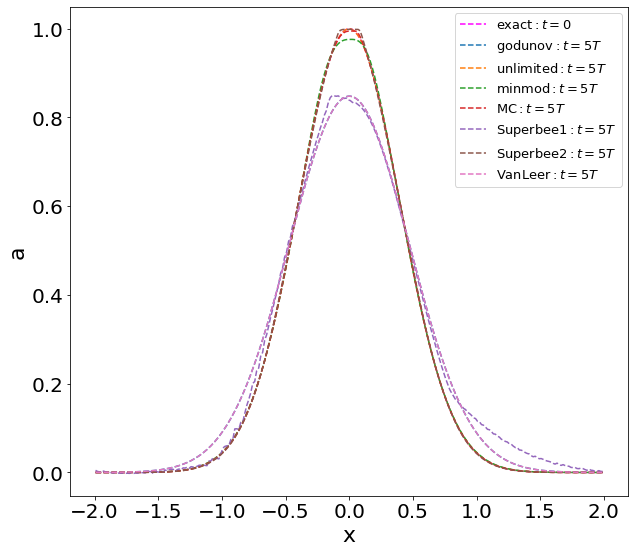

In [5]:
first = advec.Advection("gaussian",256 , 1 , 5) 
                    #(shape, n_cells, p_veloc, num_periods)

a1 = first.forms()  #.form function gives the Exact solution

#Advect gaussian profile using godunov approach with CFL = 0.8
a2 = first.advect("godunov", 0.8) 
#Advect gaussian profile using centered difference method with CFL = 0.8
a3 = first.advect("unlimited", 0.8) 
#Advect gaussian profile usind minmod slope limiter with CFL = 0.8
a4 = first.advect("minmod", 0.8) 
#Advect gaussian profile usind MC slope limiter with CFL = 0.8
a5 = first.advect("mc", 0.8) 
#Advect gaussian profile using Superbee1 slope limiter with CFL = 0.8
a6 = first.advect("superbee1", 0.8) 
#Advect gaussian profile using Superbee2(Book) slope limiter with CFL = 0.8
a7 = first.advect("superbee2", 0.8) 
#Advect gaussian profile using Van Leer slope limiter with CFL = 0.8
a8 = first.advect("van_leer", 0.8) 


# The function .plot() helps us giving us the actual x and y values to plot
x1, y1 = first.plot(a1)
x2, y2 = first.plot(a2)
x3, y3 = first.plot(a3)
x4, y4 = first.plot(a4)
x5, y5 = first.plot(a5)
x6, y6 = first.plot(a6)
x7, y7 = first.plot(a7)
x8, y8 = first.plot(a8)

# Begining of the plot

plt.figure(figsize=(10,9))

plt.plot(x1,y1, color = "magenta", linestyle = "--", label = r"${\rm exact}: t=0$")
plt.plot(x2, y2, linestyle = "--", label = r"${\rm godunov}: t=5 T$")
plt.plot(x3, y3, linestyle = "--", label = r"${\rm unlimited}: t=5 T$")
plt.plot(x4, y4, linestyle = "--", label = r"${\rm minmod}: t=5 T$")
plt.plot(x5, y5, linestyle = "--", label = r"${\rm MC}: t=5 T$")
plt.plot(x6, y6, linestyle = "--", label = r"${\rm Superbee1}: t=5 T$")
plt.plot(x7, y7, linestyle = "--", label = r"${\rm Superbee2}: t=5 T$")
plt.plot(x8, y8, linestyle = "--", label = r"${\rm Van Leer}: t=5 T$")


ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('x', size=22)
plt.ylabel('a', size=22)

plt.legend(fontsize=13)
plt.savefig('./outputfolder/gaussian_comparison_plot.png')

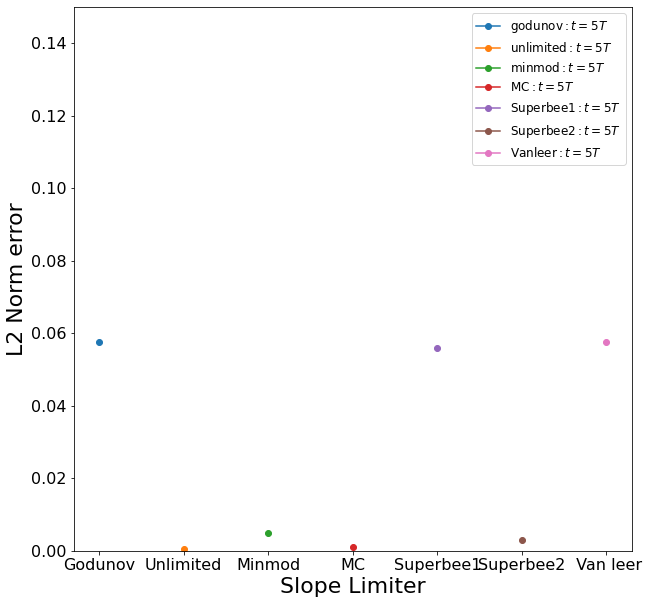

In [6]:
slope_lim = [1, 2, 3, 4, 5, 6, 7 ]
lim_names = ['Godunov', 'Unlimited', 'Minmod', 'MC', 'Superbee1', 'Superbee2', ' Van leer' ]
norms = np.zeros(7)
norms[0] = L2_norm(y1,y2)
norms[1] = L2_norm(y1,y3)
norms[2] = L2_norm(y1,y4)
norms[3] = L2_norm(y1,y5)
norms[4] = L2_norm(y1,y6)
norms[5] = L2_norm(y1,y7)
norms[6] = L2_norm(y1,y8)


plt.figure(figsize=(10,10))

plt.plot(slope_lim[0], norms[0], "-o", label = r"${\rm godunov}: t=5 T$")
plt.plot(slope_lim[1], norms[1], "-o", label = r"${\rm unlimited}: t=5 T$")
plt.plot(slope_lim[2], norms[2], "-o", label = r"${\rm minmod}: t=5 T$")
plt.plot(slope_lim[3], norms[3], "-o", label = r"${\rm MC}: t=5 T$")
plt.plot(slope_lim[4], norms[4], "-o", label = r"${\rm Superbee1}: t=5 T$")
plt.plot(slope_lim[5], norms[5], "-o", label = r"${\rm Superbee2}: t=5 T$")
plt.plot(slope_lim[6], norms[6], "-o", label = r"${\rm Van leer}: t=5 T$")


ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Slope Limiter', size=22)
plt.ylabel('L2 Norm error', size=22)
plt.xticks(slope_lim, lim_names)
plt.ylim(0,0.15)

plt.legend(fontsize=12)
plt.savefig('./outputfolder/L2norm_gaussian_comparison_plot.png')